# Ex.1 - Load Gage Data and Make a Plot a Temperature Series

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mrahnis/nb-streamgage/blob/main/Stream%20Gage%20Ex.%201%20-%20Reading%20and%20plotting.ipynb)

In [1]:
# if the notebook is running in colab we'll get the data from github
HOST_IS_COLAB = 'google.colab' in str(get_ipython())

## Importing the packages we need

First we import libraries or packages we will use. Pandas helps us to work with our data: It provides facilities to read, manipulate and write our data. Matplotlib is a library for plotting data: It provides very precise control over plot properties and with it you can produce complex multipart technical figures.

Notice that with an `import` we can assign a shorthand name using the `as` clause. We may also choose to import just part of a package as with the import of `matplotlib.pyplot` below.

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Keep track of the gages we are interested in

We can keep a dictionary of gages with the USGS identifier in the key, and a gage name in the value. Choose which one you want to plot by setting the gage variable to one of the keys.

We can print links to the USGS NWIS page for each of these in case you want to go to the source. We do this by iterating over the dictionary keys and printing the url.

In [3]:
gages = {'01576516':'east branch',
         '015765185':'west branch',
         '015765195':'mainstem'}

gage = '015765195'

for key in gages:
    print('https://waterdata.usgs.gov/monitoring-location/{}/'.format(key))

https://waterdata.usgs.gov/monitoring-location/01576516/
https://waterdata.usgs.gov/monitoring-location/015765185/
https://waterdata.usgs.gov/monitoring-location/015765195/


## Reading our data

Next we will read two parquet files using Pandas. The `read_parquet` function takes a quoted string representing the filesystem path to the file we want to read.

We use parquet here because it has some advantages over a CSV file:

- the filesize is smaller
- it is a binary format that reads quickly, whereas CSV is text that needs to be parsed
- parquet preserves the index, including indices of datetime

In [4]:
if HOST_IS_COLAB:
    df0 = pd.read_parquet('https://github.com/mrahnis/nb-streamgage/blob/main/data/lang_{}_daily_temp.parquet?raw=true'.format(gage))
else:
    df0 = pd.read_parquet('./data/lang_{}_daily_temp.parquet'.format(gage))

In [5]:
if HOST_IS_COLAB:
    df1 = pd.read_parquet('https://github.com/mrahnis/nb-streamgage/blob/main/data/nwis_{}_daily_all.parquet?raw=true'.format(gage))
else:
    df1 = pd.read_parquet('./data/nwis_{}_daily_all.parquet'.format(gage))

# Looking at our data

We can examine our `DataFrame` objects. Calling `df0.head()` shows us the first few rows of data. The datetime index is on the left. We will use the column `00010_Mean` for our plot. It corresponds to the daily mean for the USGS NWIS code 00010 for temperature in degrees celcius.

In [6]:
df0.head()

,00010_Mean,hist_mean,hist_median,diff_hist_mean,diff_hist_median,comment,site_no
datetime,,,,,,,
2008-10-08 00:00:00-05:00,12.7,15.6600,15.335,-3.0,-2.7,None,15765195
2008-10-09 00:00:00-05:00,14.8,15.3350,15.360,-0.6,-0.6,None,15765195
2008-10-10 00:00:00-05:00,13.6,14.9000,14.270,-1.3,-0.7,None,15765195
2008-10-11 00:00:00-05:00,13.0,13.7850,13.895,-0.8,-0.9,None,15765195
2008-10-12 00:00:00-05:00,13.1,13.0825,13.010,0.0,0.1,None,15765195


Looking at `df1` we will see it has several other codes. The NWIS codes included here stand for:
- 00010 : Temperature in degrees celcius
- 00060 : Discharge
- 63680 : Turbidity

We can describe them to obtain some summary statistics. 

In [7]:
df1.describe()

,00010_Maximum,00010_Minimum,00010_Mean,00060_Mean,00095_Maximum,00095_Minimum,00095_Mean,63680_Maximum,63680_Minimum,63680_Mean
count,3546.000000,3546.000000,3546.000000,5076.000000,2273.000000,2273.000000,2273.000000,2172.000000,2172.000000,2172.000000
mean,14.655753,10.344134,12.211337,2.981769,810.393313,693.237132,753.491861,36.400875,2.162799,6.965930
std,4.831149,4.094666,4.297360,3.959948,164.858284,150.283270,90.434242,93.500496,1.697484,11.176238
min,2.600000,-0.000000,1.100000,0.340000,541.000000,86.000000,375.000000,1.100000,0.000000,0.600000
25%,10.300000,6.800000,8.400000,1.420000,752.000000,685.000000,725.000000,5.800000,1.100000,2.400000
50%,15.200000,10.700000,12.700000,2.110000,779.000000,740.000000,756.000000,10.000000,1.800000,4.000000
75%,18.800000,14.100000,16.000000,3.100000,823.000000,772.000000,789.000000,29.000000,2.700000,6.900000
max,26.200000,19.700000,22.300000,70.700000,3190.000000,1050.000000,1600.000000,1190.000000,19.100000,195.000000


We can get a column from a `DataFrame` as a `Series` by refering to it using its column label. We will use this selection method to supply just the data we want in our plot.

In [8]:
df_tmp = df0['00010_Mean']
df_tmp.head()

datetime
2008-10-08 00:00:00-05:00    12.7
2008-10-09 00:00:00-05:00    14.8
2008-10-10 00:00:00-05:00    13.6
2008-10-11 00:00:00-05:00    13.0
2008-10-12 00:00:00-05:00    13.1
Name: 00010_Mean, dtype: float64

# Concatenating the data

Since we're drawing Series from two DataFrames let's concatenate to make a longer Series.

In [9]:
temps = pd.concat([df0['00010_Mean'], df1['00010_Mean']])
temps.interpolate(limit=3, inplace=True, limit_direction='forward' )
temps.head()

datetime
2008-10-08 00:00:00-05:00    12.7
2008-10-09 00:00:00-05:00    14.8
2008-10-10 00:00:00-05:00    13.6
2008-10-11 00:00:00-05:00    13.0
2008-10-12 00:00:00-05:00    13.1
Name: 00010_Mean, dtype: float64

## Plotting our data

Now we plot a time series from each of the datasets.
- The first line sets up a new figure with dimensions in inches defined using the `figsize` keyword argument.
- The second line adds a single subplot to our figure. The arguments to `add_subplot` represent the number of rows, number of columns, and index in a grid. This style of subplot maagement is familiar to Matlab users. More advanced layouts are possible as showing in the [Arranging Axes](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html) tutorial.
- The third and fourth lines add a title and y-axis label to our axes.
- The fifth and sixth lines each add a plot series to the axes that we created. It does this by calling the Pandas plot helper function for each `Series`, `df0['00010_Mean']` and `df1['00010_Mean']` and placing the output on the axis we indicate with the `ax` keyword argument. 

<AxesSubplot:title={'center':'Gage No 015765195, mainstem'}, xlabel='datetime', ylabel='$temperature, \\degree C$'>

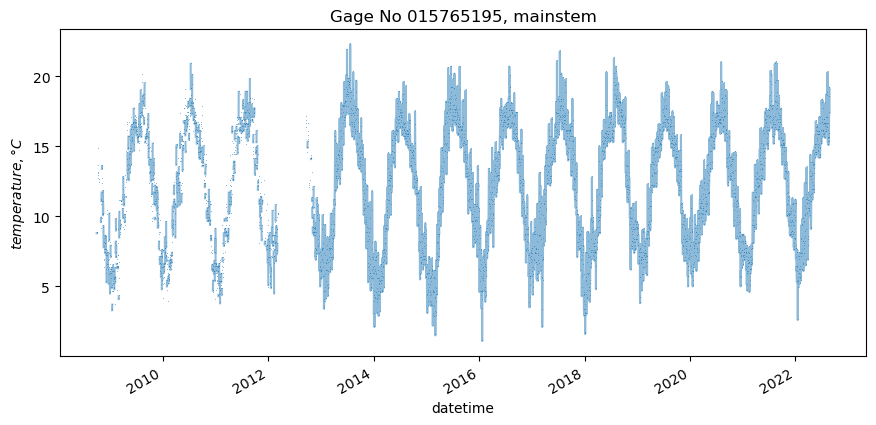

In [10]:
fig = plt.figure(figsize=(10.4,4.8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Gage No {}, {}'.format(gage, gages[gage]))
ax.set_ylabel(r'$temperature, \degree C$')
temps.plot(ax=ax, linestyle=None, marker=',', alpha=0.5)
